## Cell Filtering by QC metrics clusterization

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os


In [2]:

from sklearn.metrics import pairwise_distances
from skbio.stats.distance import DistanceMatrix
from skbio.stats.distance import permanova

In [3]:
# Define paths
path_to_denosed_data = '/home/ratopin/big_data/cellbender/full_denosied'
files = os.listdir(path_to_denosed_data)
files

['NMR3_hippocampus_denoised.h5',
 'NMR5_midbrain_denoised.h5',
 'NMR1_cerebral_cortex_denoised.h5',
 'NMR6_midbrain_denoised.h5',
 'NMR4_hippocampus_denoised.h5',
 'NMR2_cerebral_cortex_denoised.h5']

In [4]:
with open('./mito_genes.txt','r', newline='\n') as f:
    mito_genes = f.read().split('\n')[:-1]
with open('./tf_genes.txt', 'r') as f:
    tf_genes = f.read().split('\n')[:-1]
with open('./hemo_genes.txt', 'r') as f:
    hemo_genes = f.read().split('\n')[:-1]

In [5]:
# Load Data
adatas = []
for file in files:
    a = file.split('_')
    sample = a[0]
    b = a[1].split('_denoised.')
    tissue = b[0]
    print('Processing ',sample,tissue)
    adata = (sc.read_10x_h5(os.path.join(path_to_denosed_data, file)))
    adata.obs['species'] = 'nmr'
    adata.obs['sample'] = sample
    adata.obs['tissue'] = tissue
    adata.var['genome'] = 'HetGla1.0'
    print(f'Total cells imported:{len(adata)}')
    adata.var['mt'] = [gene in mito_genes for gene in adata.var_names]
    adata.var['ribo'] = adata.var_names.str.startswith(("RPL", "RPS"))
    adata.var['hb'] = [gene in hemo_genes for gene in adata.var_names]
    adata.var['tf'] = [gene in tf_genes for gene in adata.var_names]
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", 'hb', 'tf'], inplace=True)
    sc.pp.filter_cells(adata,min_counts=1, inplace=True) 
    print(f'Final cells after filtering (by min_counts = 1): {len(adata)}')
    adatas.append(adata)

Processing  NMR3 hippocampus
Total cells imported:3567595
Final cells after filtering (by min_counts = 1): 6743
Processing  NMR5 midbrain
Total cells imported:1115892
Final cells after filtering (by min_counts = 1): 7357
Processing  NMR1 cerebral
Total cells imported:3163481
Final cells after filtering (by min_counts = 1): 14268
Processing  NMR6 midbrain
Total cells imported:1114152
Final cells after filtering (by min_counts = 1): 9777
Processing  NMR4 hippocampus
Total cells imported:2864903
Final cells after filtering (by min_counts = 1): 8179
Processing  NMR2 cerebral
Total cells imported:3855172
Final cells after filtering (by min_counts = 1): 19487


/tmp/ipykernel_3031888/469939761.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = adata.obs['sample'][0]


---------------------
Working with NMR3
---------------------


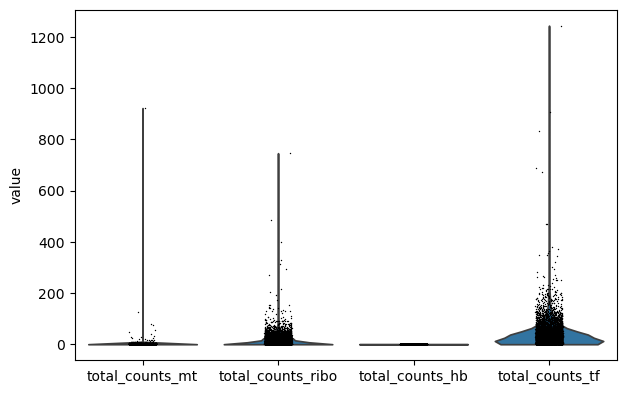

/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(
/home/ratopin/miniconda3/envs/sc-lite-env/lib/p

---------------------
Working with NMR5
---------------------


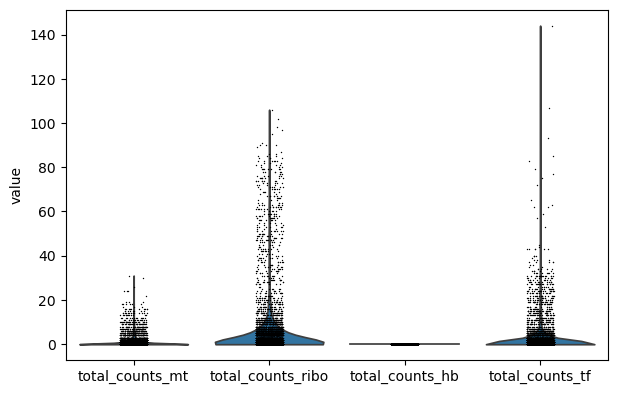

/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(
/tmp/ipykernel_3031888/469939761.py:4: FutureWa

---------------------
Working with NMR1
---------------------


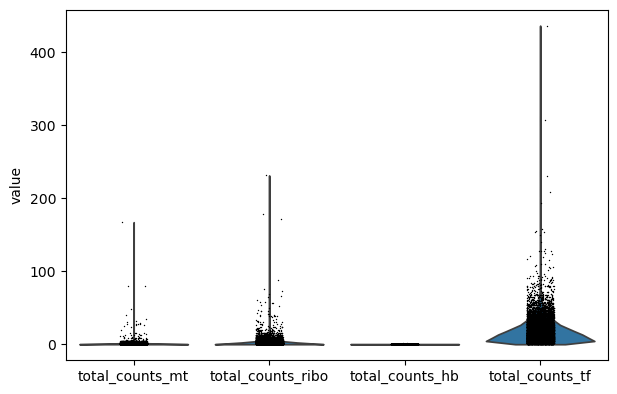

/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(
/tmp/ipykernel_3031888/469939761.py:4: FutureWa

---------------------
Working with NMR6
---------------------


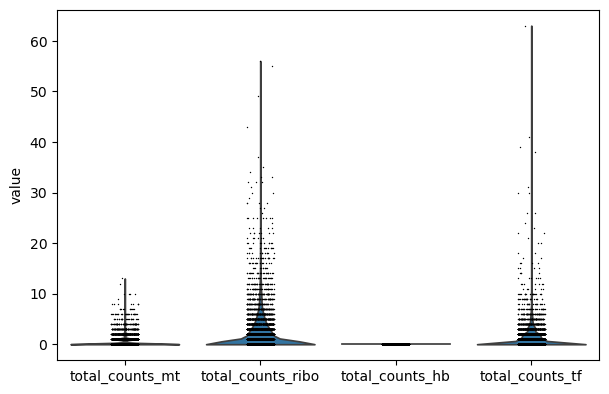

/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(
/tmp/ipykernel_3031888/469939761.py:4: FutureWa

---------------------
Working with NMR4
---------------------


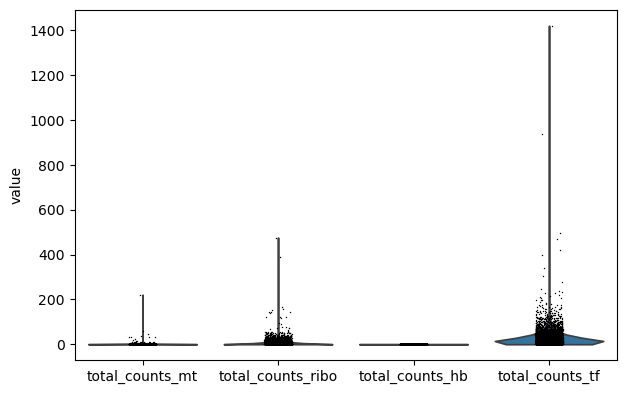

/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(
/tmp/ipykernel_3031888/469939761.py:4: FutureWa

---------------------
Working with NMR2
---------------------


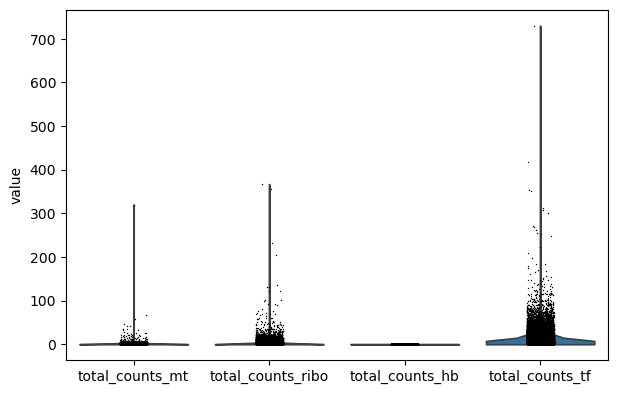

/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/ratopin/miniconda3/envs/sc-lite-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(


In [7]:
# Calcule clusters for only QC_genes
qc_adatas = []
for adata in adatas:
    sample = adata.obs['sample'].iloc[0]
    print(f'---------------------\nWorking with {sample}\n---------------------')
    sc.pl.violin(adata,['total_counts_mt','total_counts_ribo','total_counts_hb','total_counts_tf'])
    adata.var['qc_gene'] = adata.var[['mt','ribo','tf','hb']].any(axis=1)
    qc_adata = adata.copy()
    qc_genes = qc_adata.var_names[qc_adata.var['qc_gene']].to_list()
    qc_adata = qc_adata[:,qc_genes]
    sc.pp.normalize_total(qc_adata)
    sc.pp.scale(qc_adata)
    sc.tl.pca(qc_adata, svd_solver='arpack', use_highly_variable=False)
    sc.pp.neighbors(qc_adata, metric='cosine')
    sc.tl.umap(qc_adata)
    sc.tl.leiden(qc_adata, resolution=0.2, n_iterations=-1)
    qc_adatas.append(qc_adata) 
    


/tmp/ipykernel_3031888/90628651.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = qc_adata.obs['sample'][0]
/tmp/ipykernel_3031888/90628651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = qc_adata.obs['tissue'][0]


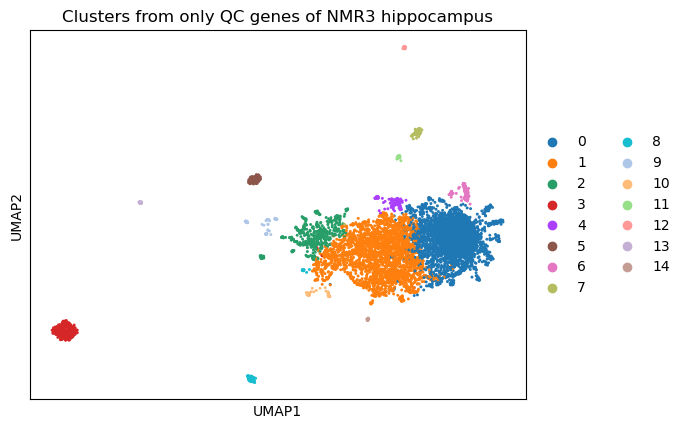

method name                 PERMANOVA
test statistic name          pseudo-F
sample size                      6743
number of groups                   15
test statistic            4642.263184
p-value                      0.009901
number of permutations            100
Name: PERMANOVA results, dtype: object
0       6505.790039
1       2964.378418
10      6551.960938
11     48464.136719
12    138352.015625
13    142578.531250
14     87266.187500
2       3434.378662
3      14649.454102
4       3850.811768
5      16523.951172
6      11302.272461
7       4524.977539
8       1660.271484
9       3365.667969
Name: qc_score, dtype: float32


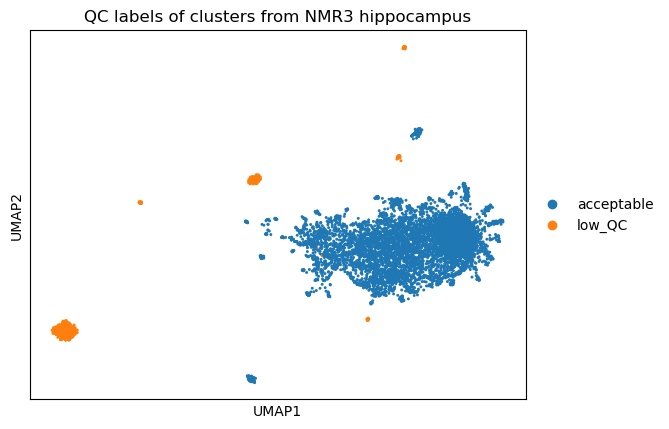

/tmp/ipykernel_3031888/90628651.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = qc_adata.obs['sample'][0]
/tmp/ipykernel_3031888/90628651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = qc_adata.obs['tissue'][0]


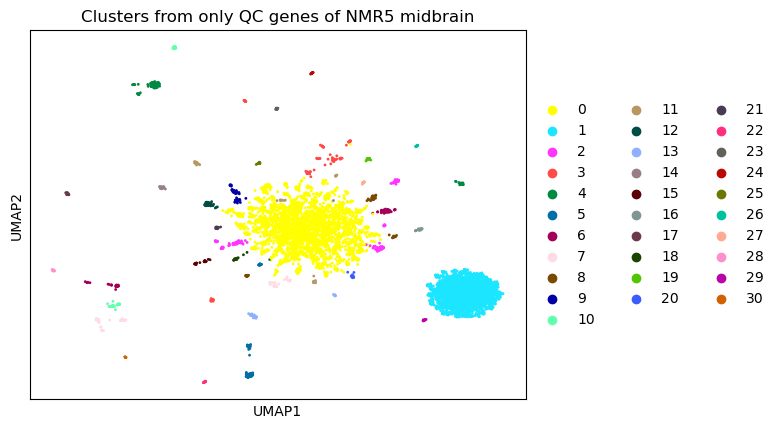

method name                 PERMANOVA
test statistic name          pseudo-F
sample size                      7357
number of groups                   31
test statistic            1205.210083
p-value                      0.009901
number of permutations            100
Name: PERMANOVA results, dtype: object
0       1737.885986
1       5508.653320
10       231.928284
11       225.179199
12     19750.978516
13       465.615509
14       617.007202
15     10166.984375
16     57377.246094
17    196449.562500
18     13316.435547
19    111198.968750
2        237.994156
20     39844.996094
21     76863.250000
22    327006.781250
23    225142.015625
24    269412.375000
25     87432.000000
26    211674.203125
27    117670.351562
28    249298.500000
29    170104.500000
3        368.546509
30    263999.156250
4        697.799988
5        628.774780
6        131.607346
7        517.836304
8        189.779114
9       3582.756836
Name: qc_score, dtype: float32


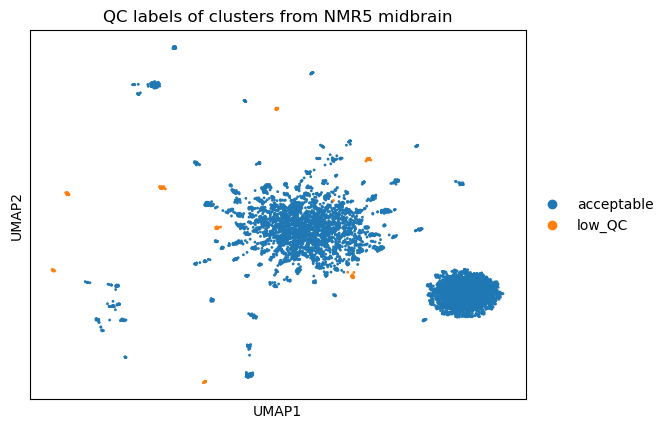

/tmp/ipykernel_3031888/90628651.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = qc_adata.obs['sample'][0]
/tmp/ipykernel_3031888/90628651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = qc_adata.obs['tissue'][0]


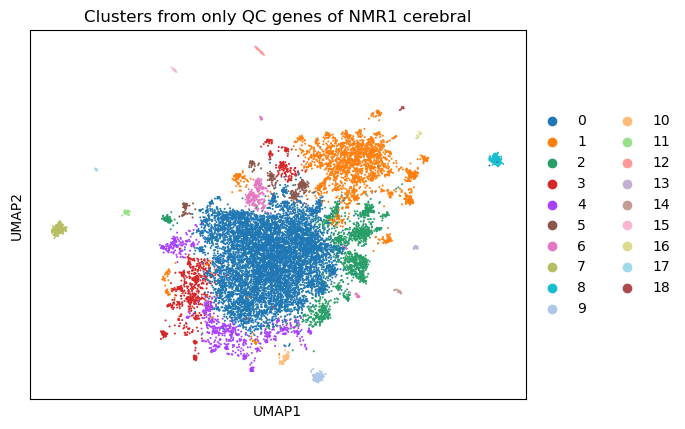

method name                 PERMANOVA
test statistic name          pseudo-F
sample size                     14268
number of groups                   19
test statistic            1495.752319
p-value                      0.009901
number of permutations            100
Name: PERMANOVA results, dtype: object
0       1638.289673
1       1917.212891
10     54458.058594
11    116137.726562
12     67528.695312
13    129832.875000
14     94281.343750
15    118130.195312
16     52110.167969
17    140343.921875
18     92199.750000
2       1072.785889
3        757.637878
4       1303.719849
5        882.430542
6        938.051025
7      90181.476562
8     105593.523438
9      78819.085938
Name: qc_score, dtype: float32


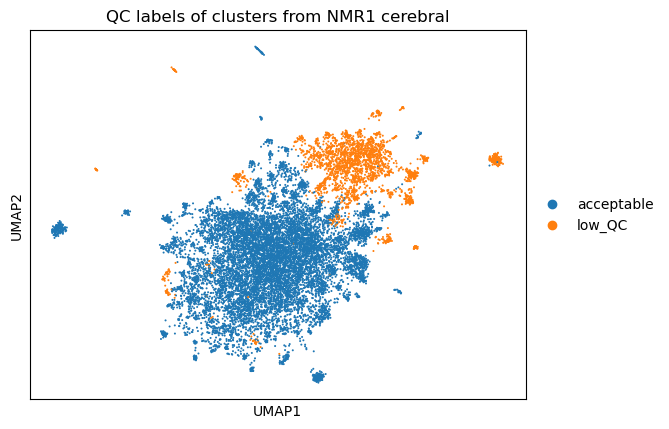

/tmp/ipykernel_3031888/90628651.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = qc_adata.obs['sample'][0]
/tmp/ipykernel_3031888/90628651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = qc_adata.obs['tissue'][0]


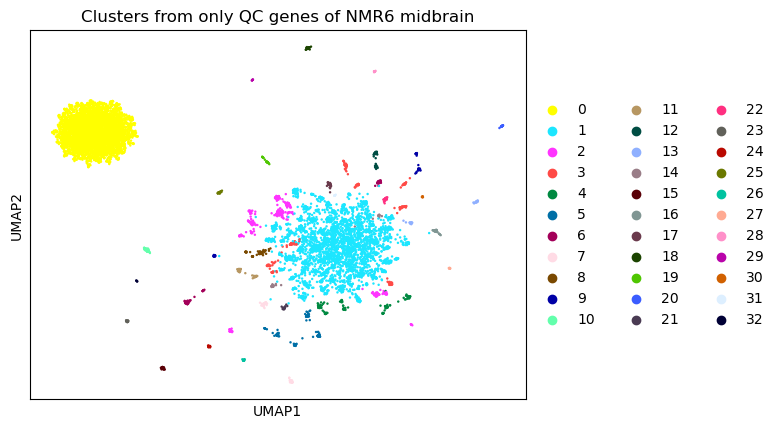

method name                 PERMANOVA
test statistic name          pseudo-F
sample size                      9777
number of groups                   33
test statistic            4146.969238
p-value                      0.009901
number of permutations            100
Name: PERMANOVA results, dtype: object
0      10075.997070
1       4577.836914
10    109877.640625
11      5825.915039
12      8216.074219
13      1094.307007
14       250.224609
15    308809.937500
16     72022.671875
17     43000.976562
18    248919.984375
19     26477.330078
2        681.001831
20    362559.437500
21     87274.125000
22     76575.734375
23    397061.562500
24       560.495850
25     82488.179688
26    313085.562500
27    293445.625000
28    306068.031250
29    287509.125000
3        690.339111
30    206607.250000
31     87890.437500
32    227117.250000
4       1423.529907
5       2275.897949
6        219.018799
7        737.632568
8       8114.743164
9        253.877090
Name: qc_score, dtype: float32


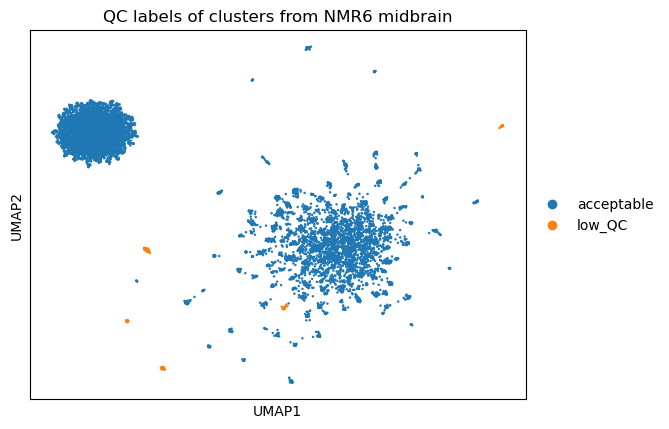

/tmp/ipykernel_3031888/90628651.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = qc_adata.obs['sample'][0]
/tmp/ipykernel_3031888/90628651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = qc_adata.obs['tissue'][0]


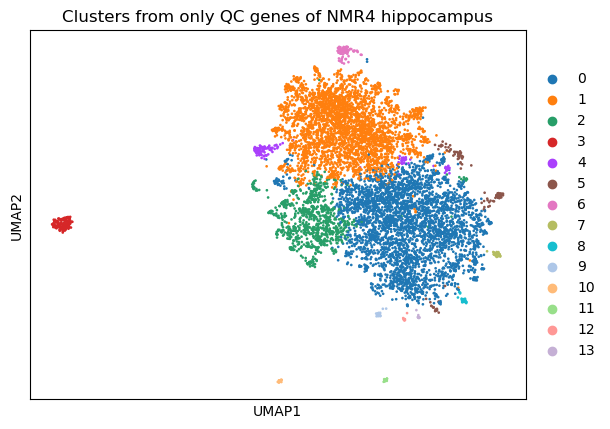

method name                 PERMANOVA
test statistic name          pseudo-F
sample size                      8179
number of groups                   14
test statistic            1706.501221
p-value                      0.009901
number of permutations            100
Name: PERMANOVA results, dtype: object
0      1616.998779
1      2036.562988
10    38784.101562
11    22757.826172
12    12364.795898
13     8189.091309
2      1525.984131
3     49479.285156
4       352.018524
5       745.963501
6     34945.738281
7     37869.414062
8     20887.791016
9     15733.656250
Name: qc_score, dtype: float32


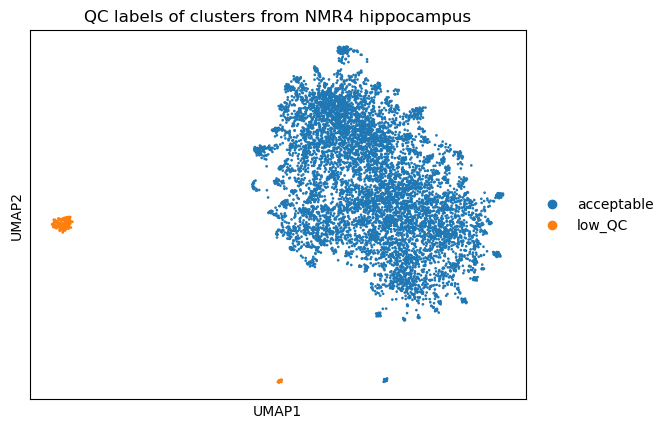

/tmp/ipykernel_3031888/90628651.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = qc_adata.obs['sample'][0]
/tmp/ipykernel_3031888/90628651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tissue = qc_adata.obs['tissue'][0]


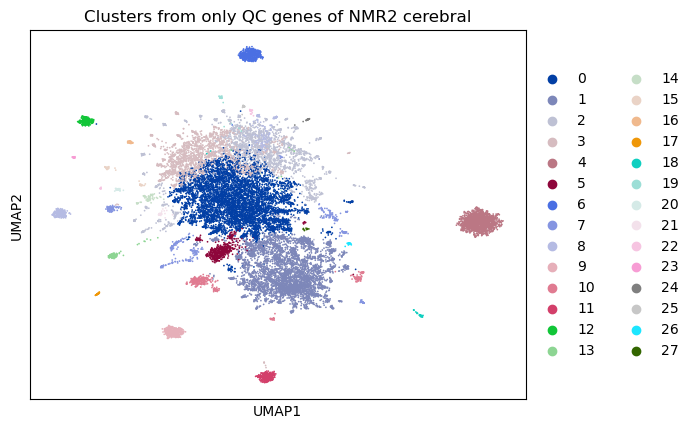

method name                 PERMANOVA
test statistic name          pseudo-F
sample size                     19487
number of groups                   28
test statistic            4291.111816
p-value                      0.009901
number of permutations            100
Name: PERMANOVA results, dtype: object
0       4761.006348
1       7275.639648
10      2170.661865
11     89682.312500
12     38601.507812
13      3098.694336
14      5293.201172
15      3320.377686
16     69766.148438
17    106424.210938
18      2039.291138
19      4825.024902
2       2879.573242
20     37642.777344
21     13293.007812
22       900.964478
23     64896.628906
24     36658.046875
25     34389.031250
26     61676.167969
27     37927.988281
3       6006.863281
4      60043.683594
5      13211.772461
6      84032.984375
7        855.418701
8        964.071472
9      65615.023438
Name: qc_score, dtype: float32


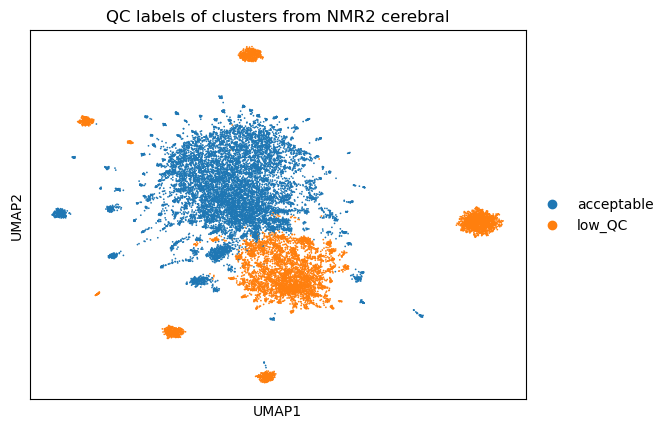

In [8]:
## Calcule QC-score and QC-labels
final_adatas = []
summaries = []
for qc_adata in qc_adatas:
    sample = qc_adata.obs['sample'][0]
    tissue = qc_adata.obs['tissue'][0]

    sc.pl.umap(qc_adata, color='leiden', title=f'Clusters from only QC genes of {sample} {tissue}')
    ## Global PERMANOVA
    locations = pd.DataFrame(qc_adata.obsm['X_umap'], index=qc_adata.obs_names, columns=['UMAP1', 'UMAP2'])
    pairwise_dist = pairwise_distances(locations[['UMAP1', 'UMAP2']], metric='euclidean')
    distance_matrix = DistanceMatrix(pairwise_dist, ids=qc_adata.obs_names, validate=True, condensed=False)
    res = permanova(distance_matrix,grouping=qc_adata.obs['leiden'], permutations=100)
    print(res)
    ## Pairwise PREMANOVA
    clusters = qc_adata.obs['leiden'].unique()
    clusters = sorted(clusters)

    pairwise_results = []
    for g1 in clusters:
        for g2 in clusters:
            if g1 >= g2:
                continue
            
            # subset ids
            ids = qc_adata.obs_names[(qc_adata.obs['leiden'] == g1) | (qc_adata.obs['leiden'] == g2)]

            sub_dm = distance_matrix.filter(ids, strict=True)
            sub_group = qc_adata.obs.loc[ids, 'leiden']

            result = permanova(sub_dm,grouping=sub_group,permutations=100)

            pairwise_results.append({
                'cluster1': g1,
                'cluster2': g2,
                'pseudo_F': result['test statistic'],
                'p_value': result['p-value']
            })

    pairwise_df = pd.DataFrame(pairwise_results)
    ## QC score

    qc_scores = {}

    for g in clusters:
        # all rows in which this cluster appears
        mask = (pairwise_df['cluster1'] == g) | (pairwise_df['cluster2'] == g)
        qc_scores[g] = pairwise_df.loc[mask, 'pseudo_F'].mean()

    qc_scores = pd.Series(qc_scores, name='qc_score')
    print(qc_scores)

    qc_markers = qc_adata.obs[['total_counts',
                            'total_counts_tf',
                            'pct_counts_mt',
                            'pct_counts_ribo',
                            'pct_counts_hb', 'leiden']].copy()

    ## Combine pseudo-F QC score with biological QC means
    summary =  qc_markers.groupby('leiden', observed=True).mean()
    summary['pseudoF_qc_score'] = qc_scores

    ## Normalize each QC metric so they point in the SAME direction
    # (higher = worse QC)
    summary['qc_composite'] = (
        -summary['total_counts'].rank() +          # lower counts = worse QC
        -summary['total_counts_tf'].rank() +            # fewer TF genes = worse QC
        summary['pct_counts_mt'].rank() +              # higher mito = worse QC
        summary['pct_counts_ribo'].rank() +              # higher ribo = worse QC
        summary['pct_counts_hb'].rank() +                # higher Hb = worse QC
        2*summary['pseudoF_qc_score'].rank()        # further from other clusters *2 because is highly important
    )

    ## Classify clusters
    threshold = summary['qc_composite'].mean() +  0.7*summary['qc_composite'].std() 

    summary['QC_label'] = np.where(summary['qc_composite'] >= threshold,'low_QC','acceptable')
    summaries.append(summary)

    ## Add composite QC and label to qc_adata and plot
    qc_adata.obs['qc_composite']= qc_adata.obs['leiden'].map(summary['qc_composite'].to_dict())
    qc_adata.obs['qc_label']= qc_adata.obs['leiden'].map(summary['QC_label'].to_dict())
    sc.pl.umap(qc_adata, color='qc_label', title=f'QC labels of clusters from {sample} {tissue}')
    final_adatas.append(qc_adata.copy())

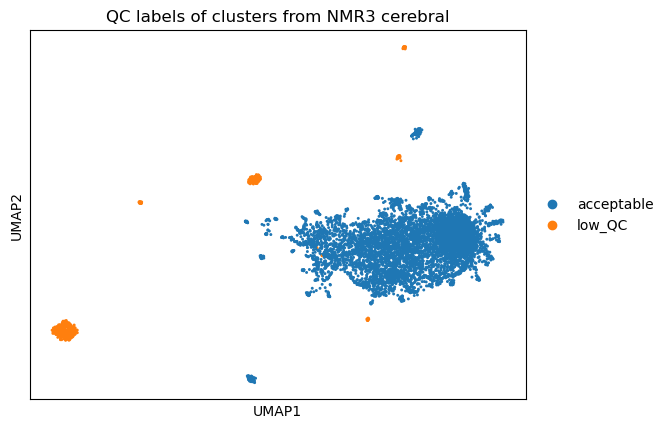

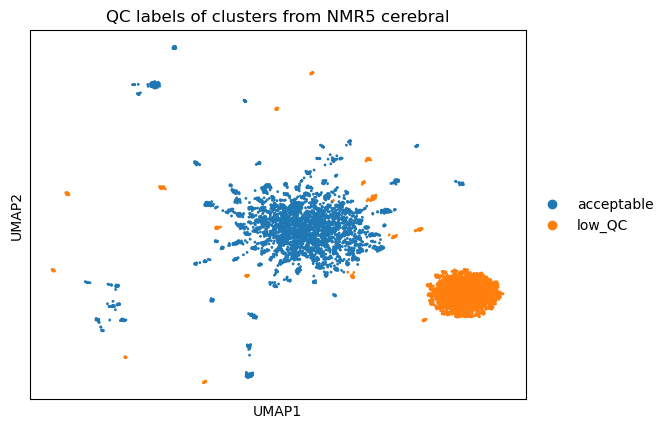

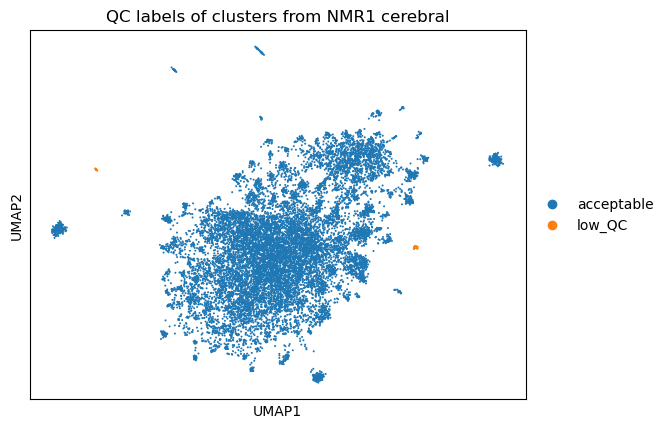

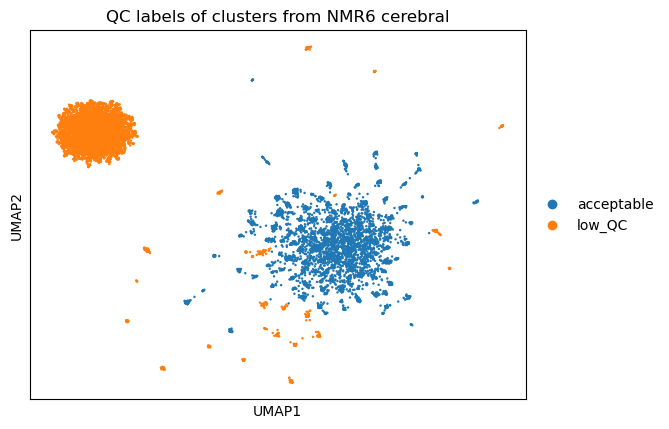

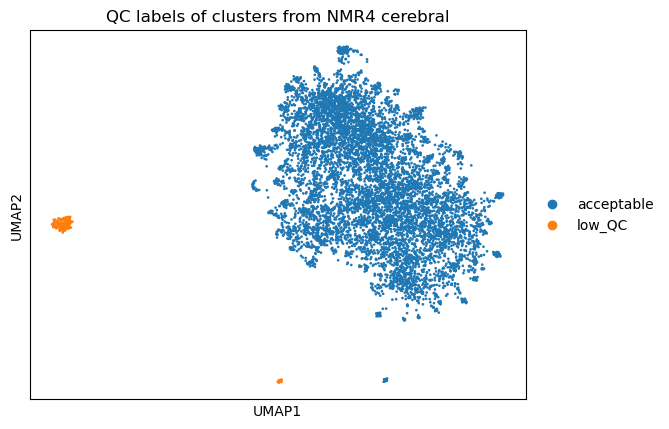

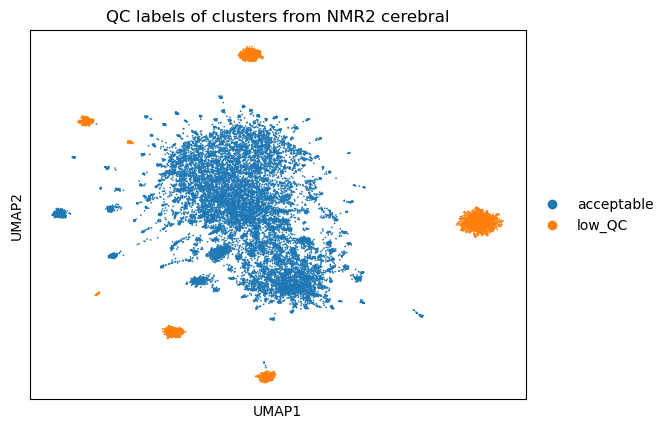

In [ ]:
# Manually change the threshold
adj_adatas = []
for qc_adata, summary in zip(final_adatas, summaries):
    sample = qc_adata.obs['sample'].iloc[0]
    if sample == 'NMR1' or sample == 'NMR2' :
        threshold = summary['qc_composite'].mean() +  1*summary['qc_composite'].std()
    elif sample == 'NMR3' or sample == 'NMR4':
        threshold = summary['qc_composite'].mean() +  0.7*summary['qc_composite'].std()
    else: 
        threshold = summary['qc_composite'].mean() +  (-.15)*summary['qc_composite'].std()
    
    summary['QC_label'] = np.where(summary['qc_composite'] >= threshold,'low_QC','acceptable')
    qc_adata.obs['qc_label']= qc_adata.obs['leiden'].map(summary['QC_label'].to_dict())
    sc.pl.umap(qc_adata, color='qc_label', title=f'QC labels of clusters from {sample} {tissue}')
    adj_adatas.append(qc_adata.copy())


In [43]:
adata

AnnData object with n_obs × n_vars = 6743 × 299
    obs: 'species', 'sample', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_tf', 'log1p_total_counts_tf', 'pct_counts_tf', 'n_counts', 'leiden', 'qc_composite', 'qc_label'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'tf', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'qc_gene', 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'qc_label_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

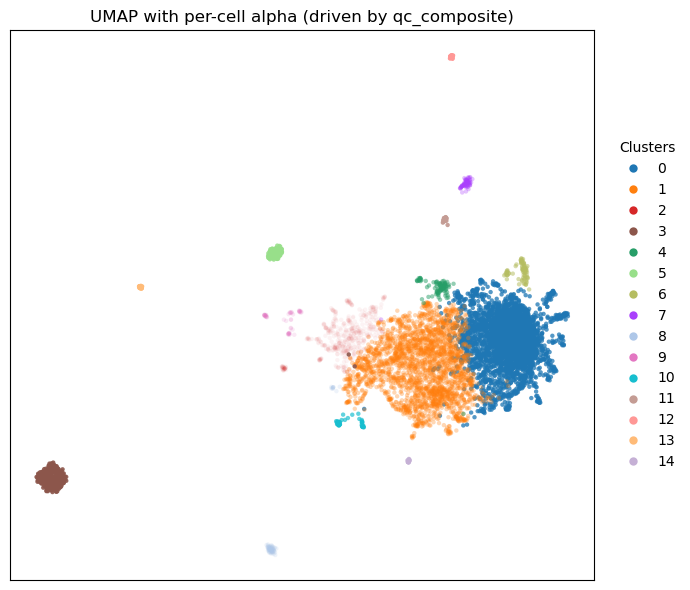

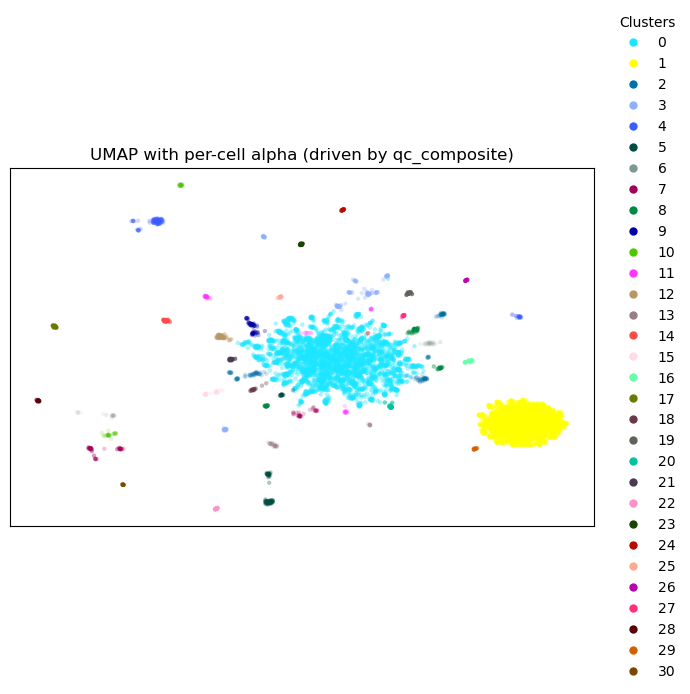

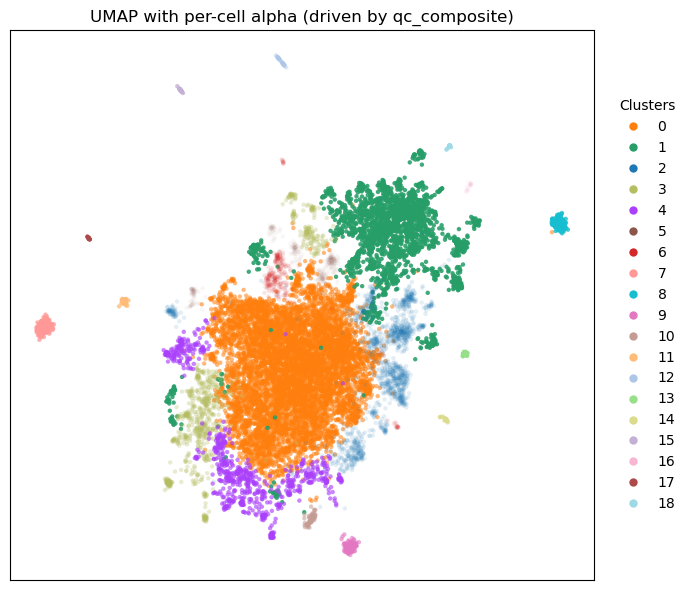

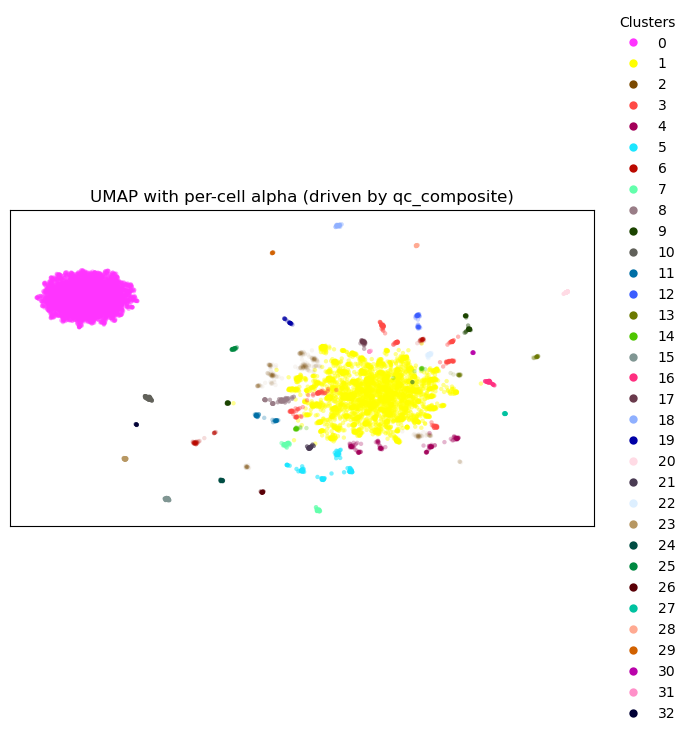

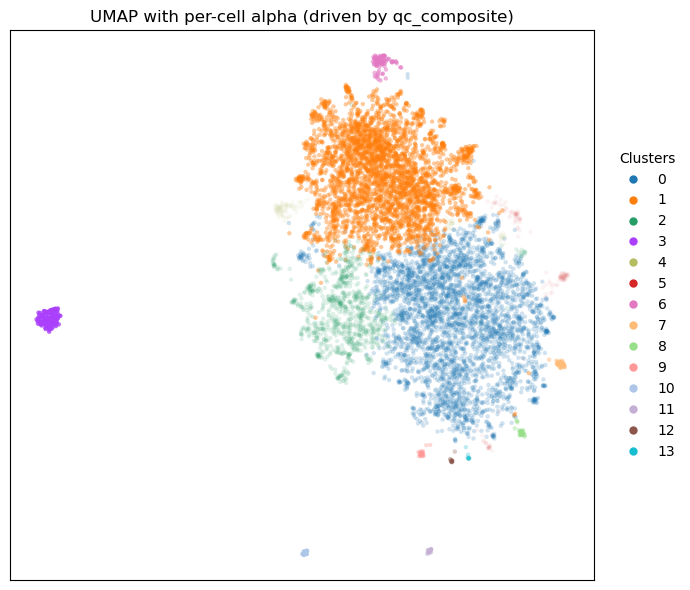

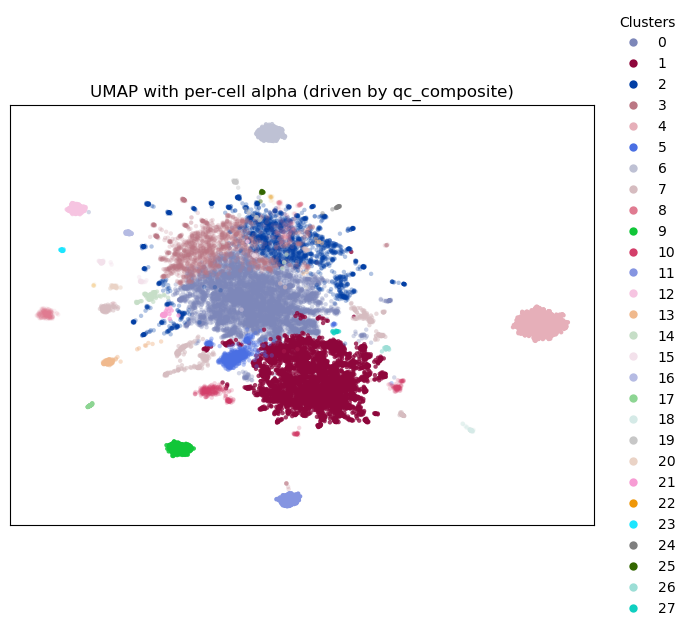

In [46]:
from special_functions import umap_alpha
for adata in adj_adatas:
    umap_alpha(adata, color_col='leiden', alpha_col='qc_composite', size= 10)

In [34]:
# Save filtered cells
out_dir = '/home/ratopin/big_data/filtered'
for qc_adata, adata in zip(adj_adatas, adatas,  ):
    print(f'Saving {adata.obs['sample'].iloc[0]}...' )
    path = os.path.join(out_dir, f'{adata.obs['sample'].iloc[0]}_{adata.obs['tissue'].iloc[0]}_filtered.h5ad')
    adata.obs['qc_composite'] = qc_adata.obs['qc_composite']
    adata.obs['qc_label'] = qc_adata.obs['qc_label']
    adata = adata[adata.obs['qc_label']=='acceptable',:].copy()
    print(adata)
    adata.write_h5ad(path)
    print(f'Successfully saved {adata.obs['sample'].iloc[0]} into {path}...' )


Saving NMR3...
AnnData object with n_obs × n_vars = 6284 × 20774
    obs: 'species', 'sample', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_tf', 'log1p_total_counts_tf', 'pct_counts_tf', 'n_counts', 'qc_composite', 'qc_label'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'tf', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'qc_gene'
Successfully saved NMR3 into /home/ratopin/big_data/filtered/NMR3_hippocampus_filtered.h5ad...
Saving NMR5...
AnnData object with n_obs × n_vars = 4467 × 20774
    obs: 'species', 'sample', 'ti

In [63]:
from special_functions import umap_alpha, describe_obs_by_cluster, boxplot_obs_by_cluster


/tmp/ipykernel_3029642/208139372.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'---------------------\nWorking with {qc_adata.obs['sample'][0]}\n---------------------')


---------------------
Working with NMR3
---------------------


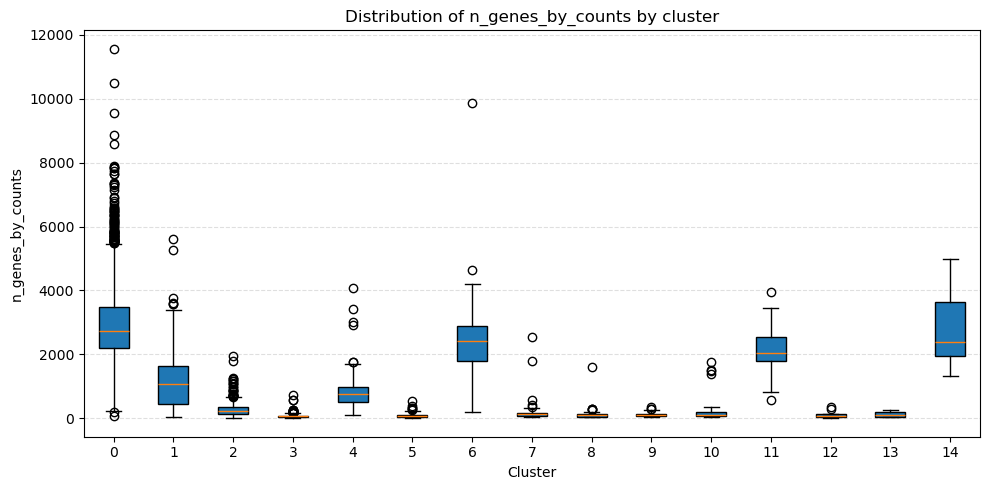

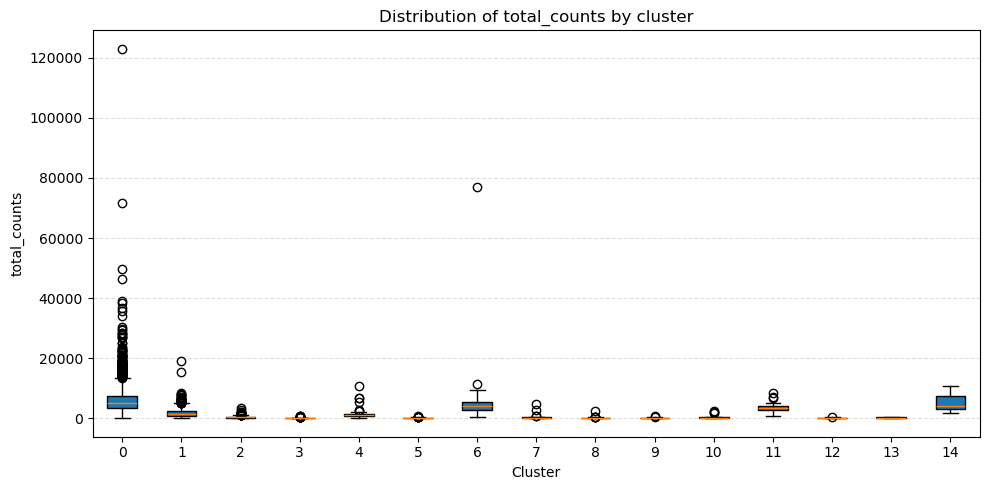

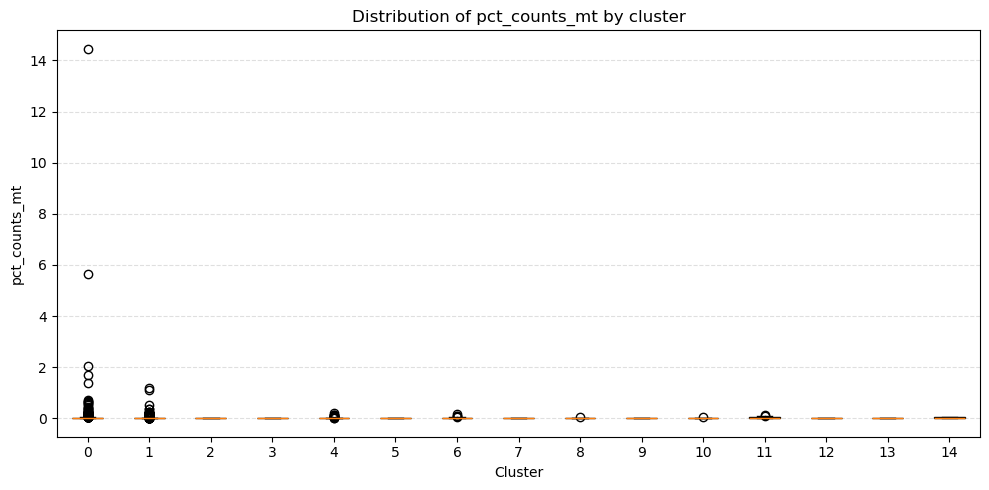

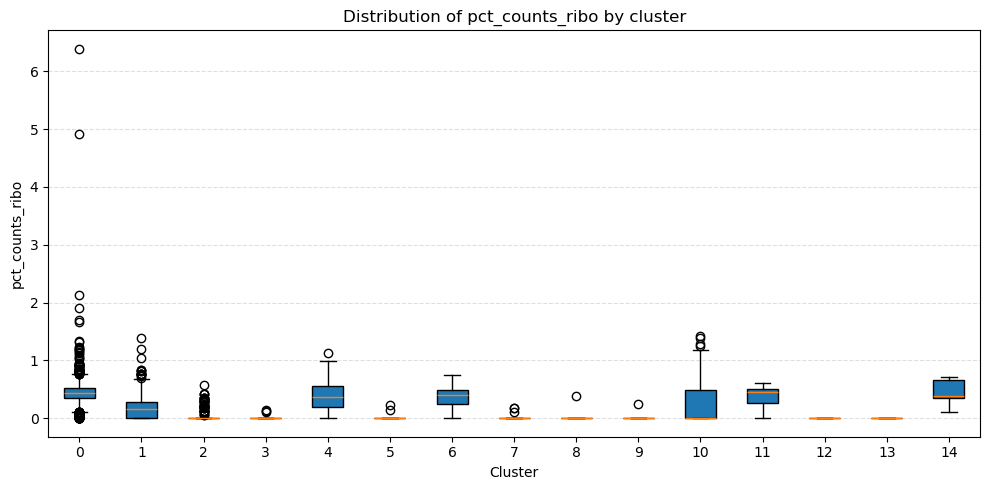

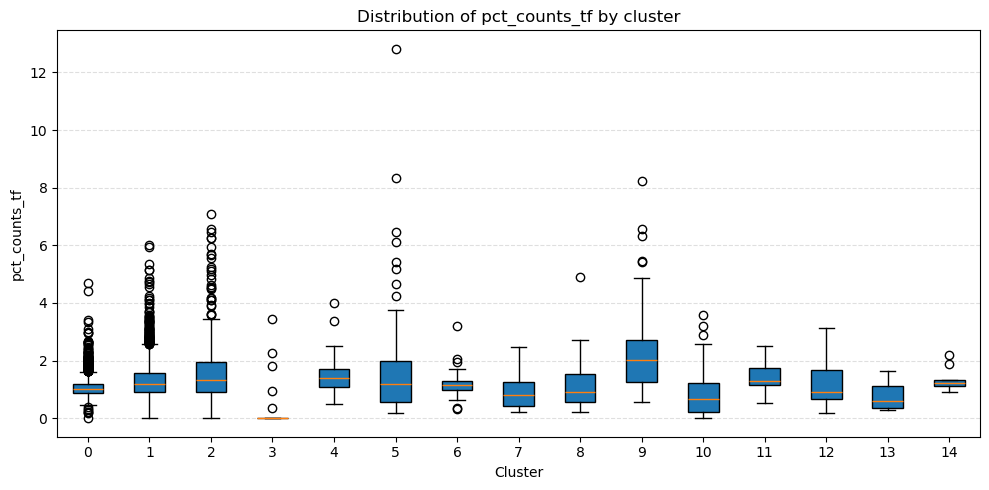

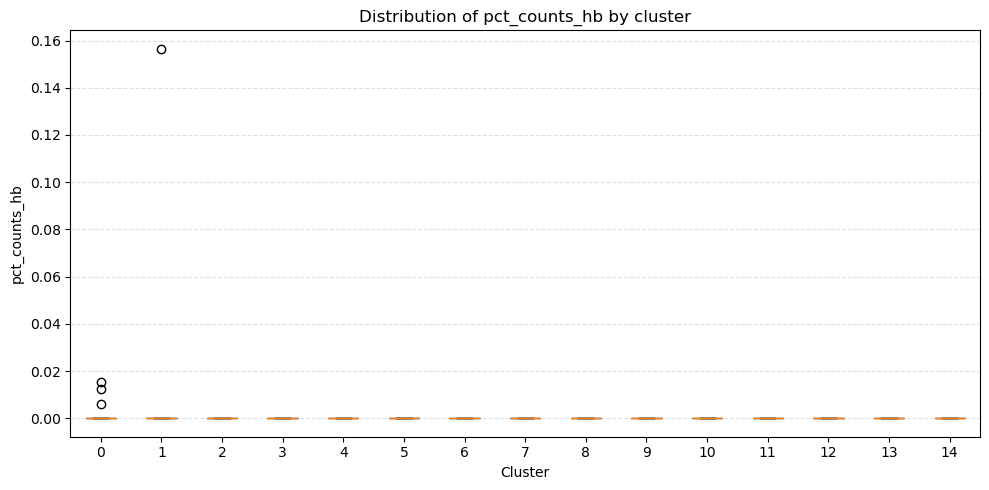

In [64]:
# Plotting
metrics = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_tf', 'pct_counts_hb']
for qc_adata in qc_adatas:
    print(f'---------------------\nWorking with {qc_adata.obs['sample'][0]}\n---------------------')
    boxplot_obs_by_cluster(qc_adata, 'leiden', metrics)

In [130]:
from special_functions import umap_alpha, describe_obs_by_cluster, boxplot_obs_by_cluster

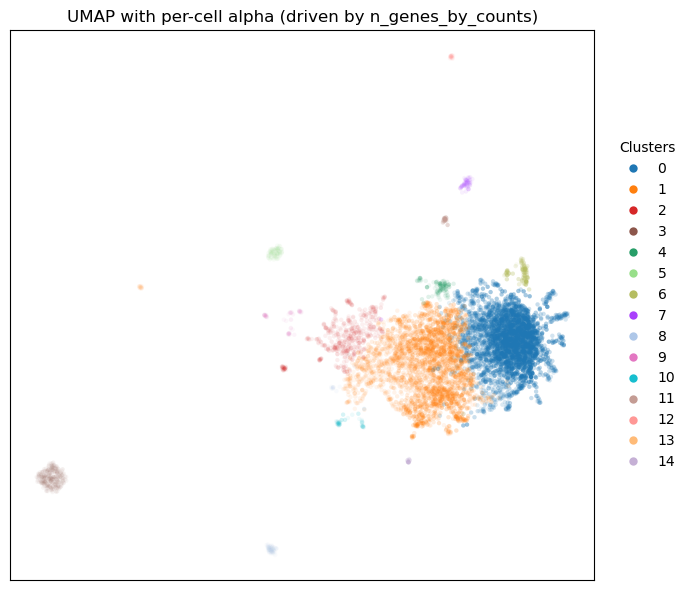

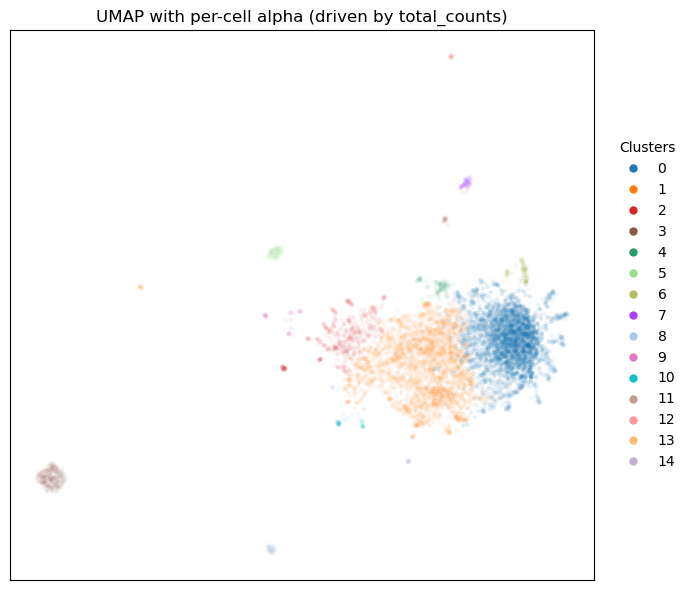

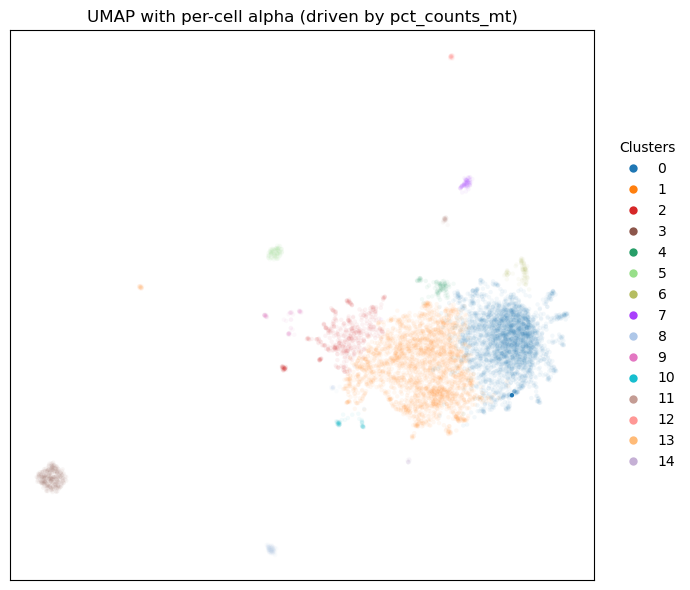

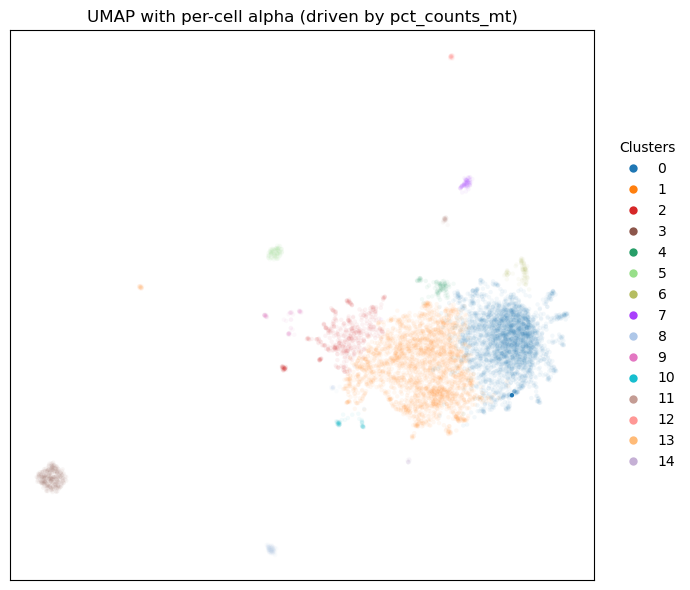

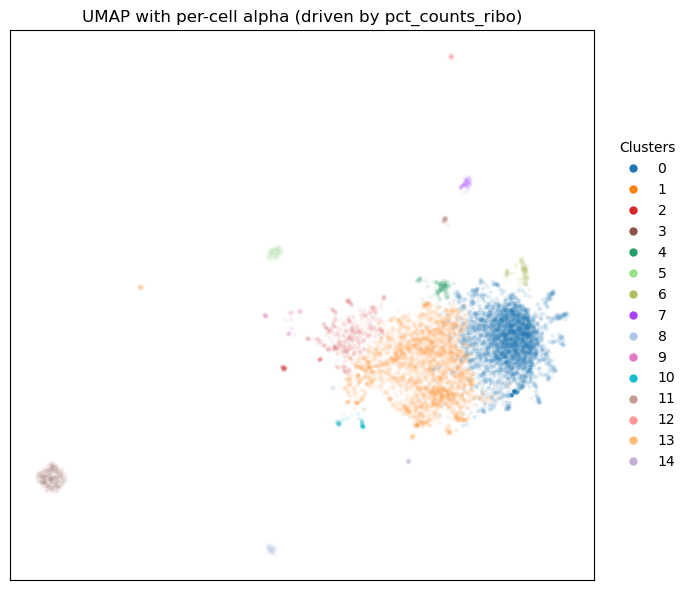

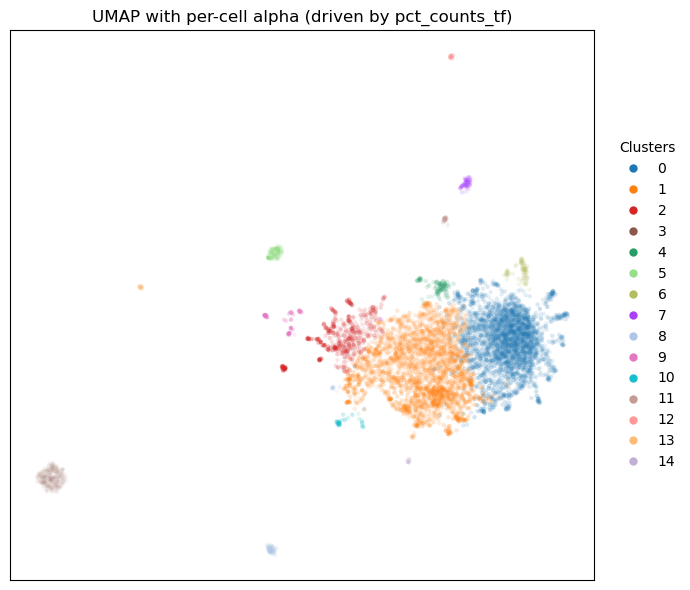

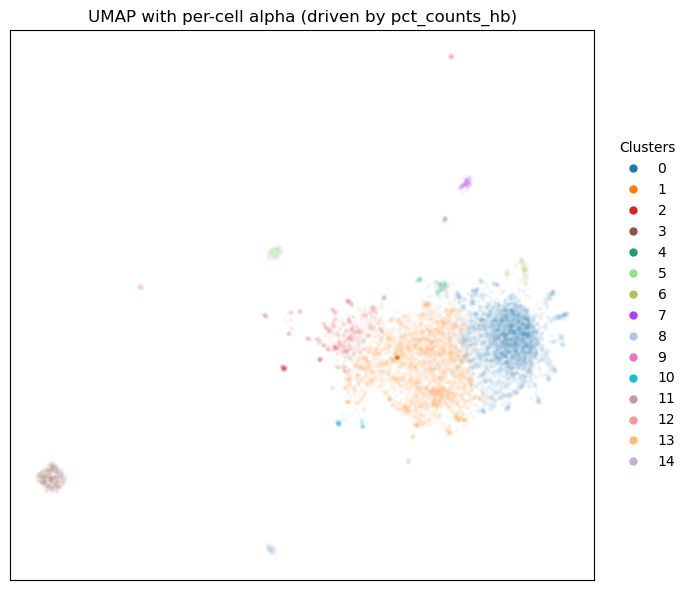

In [65]:
metrics = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_tf', 'pct_counts_hb']
for metric in metrics:
    umap_alpha(qc_adata, color_col='leiden', alpha_col=metric, size= 10)

In [35]:
from special_functions import describe_obs_by_cluster
describe_obs_by_cluster(qc_adata, 'leiden', ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_tf', 'pct_counts_hb'])

n_genes_by_counts                         total_counts                  \
                    mean  min   max          std         mean    min      max   
leiden                                                                          
0             858.951857   29  4142   673.141102  1468.245358   47.0  10475.0   
1            1129.577515   19  8820  1023.809132  2001.512157   27.0  44836.0   
10           1544.812155   79  4727   890.050699  2759.129834  123.0  13670.0   
11            109.500000   29   440    71.907575   176.741135   43.0    751.0   
12             99.525641   24   544    70.734053   172.021368   36.0    909.0   
13            121.097015   25   448    70.941559   199.373134   45.0    756.0   
14            223.368421   31  2136   375.377280   363.710526   51.0   3701.0   
15            277.430556   32  1896   349.572327   478.000000   46.0   3249.0   
16            115.259259   36   310    56.703527   181.611111   67.0    523.0   
17            136.230769   30   468   103.169120   228.807692   41.0    762.0   
18            179.127660   32   529   109.520222   283.723404   47.0    808.0   
19            125.534884   38   322    71.967370   211.953488   57.0    572.0   
2             229.913386   23  2474   205.984242   394.136811   28.0   5215.0   
20           1438.200000   61  3349   778.625667  2533.600000  105.0   7383.0   
21            344.100000   70  1974   384.242861   550.333333   81.0   3483.0   
22            130.250000   42   278    66.724766   216.250000   76.0    523.0   
23            119.080000   42   292    67.795600   206.320000   83.0    519.0   
24            165.250000   40   560   124.807417   289.541667   72.0   1043.0   
25            143.250000   50   374    91.519267   260.650000   96.0    718.0   
26            287.947368   63  1383   332.071022   429.210526   94.0   2211.0   
27            750.214286  201  1622   538.885342  1212.428571  313.0   2623.0   
3             287.924365   29  2802   273.178492   479.655321   46.0   5765.0   
4              75.142475   20   408    47.353343   125.951171   29.0    635.0   
5            1425.430712   84  3919   704.542986  2489.039326  117.0   9370.0   
6             116.537657   23   721    76.331546   198.037657   29.0   1272.0   
7             245.453961   30  2670   307.636901   394.109208   43.0   5999.0   
8             157.449275   23  1745   212.331520   263.611111   31.0   2985.0   
9             102.508197   22   478    63.230942   180.699454   37.0    786.0   

                    pct_counts_mt       ... pct_counts_ribo            \
                std          mean  min  ...             max       std   
leiden                                  ...                             
0       1255.741077      0.001680  0.0  ...        2.238806  0.174908   
1       2419.920961      0.131942  0.0  ...        8.008214  0.644768   
10      1957.898584      0.007772  0.0  ...        1.669449  0.189611   
11       115.911214      0.000000  0.0  ...        0.000000  0.000000   
12       123.717886      0.000000  0.0  ...        0.000000  0.000000   
13       118.087432      0.000000  0.0  ...        0.377358  0.032599   
14       618.972133      0.010611  0.0  ...        1.041667  0.153030   
15       607.176031      0.003315  0.0  ...        0.504626  0.108989   
16        88.270258      0.000000  0.0  ...        0.000000  0.000000   
17       176.139989      0.000000  0.0  ...        0.000000  0.000000   
18       178.868509      0.000000  0.0  ...        0.166945  0.024351   
19       136.572491      0.000000  0.0  ...        0.000000  0.000000   
2        363.283970      0.000775  0.0  ...        2.380952  0.199511   
20      1567.133524      0.002874  0.0  ...        0.813008  0.193508   
21       660.977559      0.009921  0.0  ...        0.787402  0.243680   
22       114.105417      0.000000  0.0  ...        0.000000  0.000000   
23       123.972685      0.000000  0.0  ...        0.000000  0.000000   
24       240.566718      0.000000  

In [36]:
def describe_obs_by_cluster(adata, cluster_key, columns):
    """
    Compute mean, min, max, std for selected obs columns grouped by clusters.

    Parameters
    ----------
    adata : AnnData
        The annotated data matrix.
    cluster_key : str
        Column in adata.obs that defines clusters (e.g. "leiden").
    columns : list of str
        obs columns to summarize.

    Returns
    -------
    pandas.DataFrame
        Multi-index columns (metric, variable) and index = clusters.
    """
    df = adata.obs[[cluster_key] + columns].copy()
    df[cluster_key] = df[cluster_key].astype(str)

    grouped = df.groupby(cluster_key)   # pandas groupby

    stats = grouped.agg(["mean", "min", "max", "std"])
    return stats


In [37]:
stats = describe_obs_by_cluster(qc_adata, 'leiden', ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_tf', 'pct_counts_hb'])

In [38]:
import matplotlib.pyplot as plt

def boxplot_obs_by_cluster(adata, cluster_key, columns):
    """
    Plot boxplots for selected obs columns grouped by cluster.
    One figure per obs column.
    """
    df = adata.obs[[cluster_key] + columns].copy()
    df[cluster_key] = df[cluster_key].astype(str)

    # sort cluster labels numerically
    cluster_order = sorted(df[cluster_key].unique(), key=lambda x: int(x))

    for col in columns:
        plt.figure(figsize=(10, 5))
        plt.title(f"Distribution of {col} by cluster")

        data = [df.loc[df[cluster_key] == cl, col].dropna().values
                for cl in cluster_order]

        plt.boxplot(
            data,
            labels=cluster_order,
            notch=False,
            patch_artist=True
        )

        plt.xlabel("Cluster")
        plt.ylabel(col)
        plt.grid(axis="y", linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()


In [121]:
from special_functions import umap_alpha, describe_obs_by_cluster, boxplot_obs_by_cluster

In [132]:
describe_obs_by_cluster(qc_adata, 'leiden', metrics)

n_genes_by_counts                        total_counts                  \
                    mean  min   max         std         mean    min      max   
leiden                                                                         
0            1054.580460   45  3913  575.739078  1577.575085   58.0   8919.0   
1             773.102618   50  7824  812.385920  1173.422513   62.0  30819.0   
10            643.234234   66  2750  584.395880   946.945946   81.0   5036.0   
11            152.224299   56  1307  139.119625   214.439252   86.0   2053.0   
12           1157.446429  110  3904  647.133144  1778.875000  161.0   8453.0   
13           1468.256410  237  2775  669.142095  2368.641026  287.0   5572.0   
14           1252.000000  192  2092  546.808925  1864.454545  215.0   3586.0   
15           1453.937500  525  2359  646.579355  2352.812500  675.0   4636.0   
16           1510.312500  310  3693  832.693198  2446.375000  407.0   6653.0   
17           1250.142857  274  2305  705.307228  1957.714286  320.0   4020.0   
18           1257.777778  628  2153  553.791201  1965.333333  766.0   3924.0   
2             304.069838   54  2549  329.868105   426.915992   73.0   5375.0   
3            1382.503374   72  4016  638.563516  2189.422402   91.0   9885.0   
4             252.539116   57  2574  230.275452   340.239796   75.0   5302.0   
5            1637.220896  129  4708  754.573801  2768.268657  150.0  12078.0   
6            1131.837037   77  3019  693.702225  1769.703704  100.0   6657.0   
7            1211.410628   72  4207  715.993166  1858.357488  107.0   9990.0   
8             117.383562   50   819   78.578690   161.486301   67.0   1037.0   
9             143.845588   55   728   91.771607   214.705882   86.0   1052.0   

                    pct_counts_mt       ... pct_counts_ribo            \
                std          mean  min  ...             max       std   
leiden                                  ...                             
0       1055.754144      0.001620  0.0  ...        3.105590  0.126096   
1       1751.119781      0.243963  0.0  ...       13.071895  0.886196   
10       987.988405      0.005544  0.0  ...        0.720288  0.131278   
11       211.215404      0.000000  0.0  ...        0.097418  0.009418   
12      1286.397409      0.029764  0.0  ...        0.595238  0.113257   
13      1322.911452      0.011142  0.0  ...        1.151631  0.201767   
14      1013.405138      0.000000  0.0  ...        0.465116  0.104446   
15      1361.878517      0.000000  0.0  ...        0.960384  0.230818   
16      1661.164005      0.013126  0.0  ...        1.692047  0.429269   
17      1299.685372      0.064205  0.0  ...        2.812500  0.775496   
18      1138.787513      0.000000  0.0  ...        0.261097  0.086765   
2        517.385585      0.003880  0.0  ...        2.298851  0.232597   
3       1268.574952      0.008605  0.0  ...        2.120141  0.177292   
4        354.144152      0.010665  0.0  ...        1.941748  0.175540   
5       1710.218572      0.021863  0.0  ...        2.666667  0.326979   
6       1302.908777      0.000000  0.0  ...        0.322061  0.072914   
7       1405.917649      0.021518  0.0  ...        3.333333  0.412010   
8        105.204316      0.000000  0.0  ...        0.000000  0.000000   
9        133.591313      0.000000  0.0  ...        0.144300  0.012374   

       pct_counts_tf                                pct_counts_hb       \
                mean       min        max       std          mean  min   
leiden                                                                   
0           1.232166  0.000000   7.207207  0.504787      0.000033  0.0   
1           1.572967  0.000000   6.428571  0.760513      0.000000  0.0   
10          1.620843  0.303951   5.389222  0.812495      0.000000  0.0   
11          1.101364  0.139665   3.448276  0.728398      0.000000  0.0   
12          1.452993  0.630011   2.976190  0.505797      0.000000  0.0   
13          1.347398  0.835866   2.787456  0.41

In [133]:
def boxplot_obs_by_cluster(adata, cluster_key, obs_columns):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    df = adata.obs.copy()

    # Ensure numeric columns are treated as numeric
    for col in obs_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    for col in obs_columns:
        # Compute cluster means for sorting
        cluster_means = (
            df.groupby(cluster_key)[col]
            .mean()
            .sort_values()    # ascending order by mean
        )

        # Sorted cluster labels
        sorted_clusters = cluster_means.index.tolist()

        # Build data list in that order
        data = [
            df.loc[df[cluster_key] == cl, col].dropna().values
            for cl in sorted_clusters
        ]

        plt.figure(figsize=(10, 6))

        plt.boxplot(
            data,
            labels=sorted_clusters,
            notch=False,
            patch_artist=True
        )

        plt.title(f"Distribution of {col} by cluster (sorted by mean)")
        plt.xlabel("Cluster (sorted)")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


/tmp/ipykernel_3007770/3631609162.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cluster_key)[col]
/tmp/ipykernel_3007770/3631609162.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


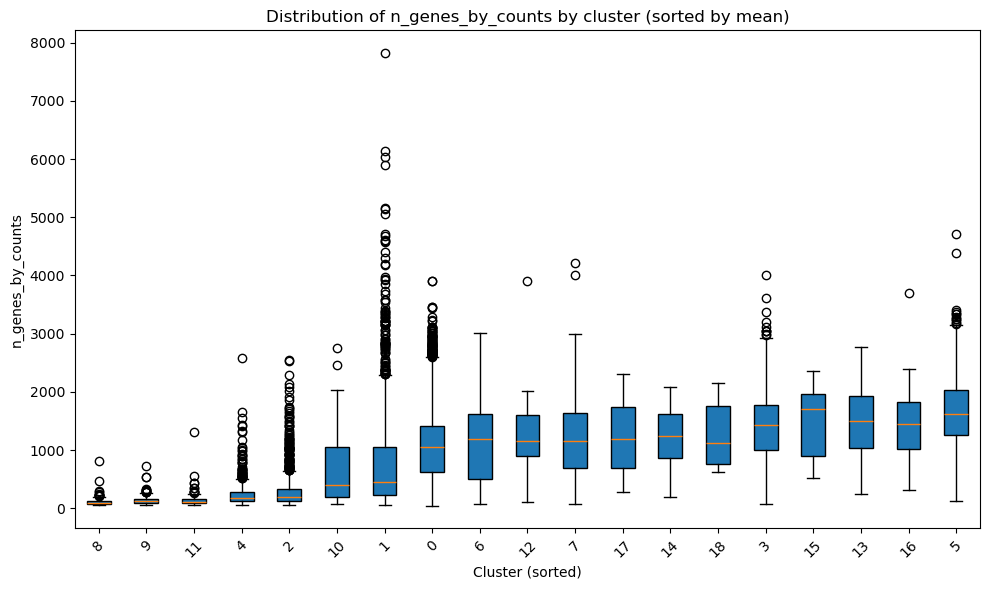

/tmp/ipykernel_3007770/3631609162.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cluster_key)[col]
/tmp/ipykernel_3007770/3631609162.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


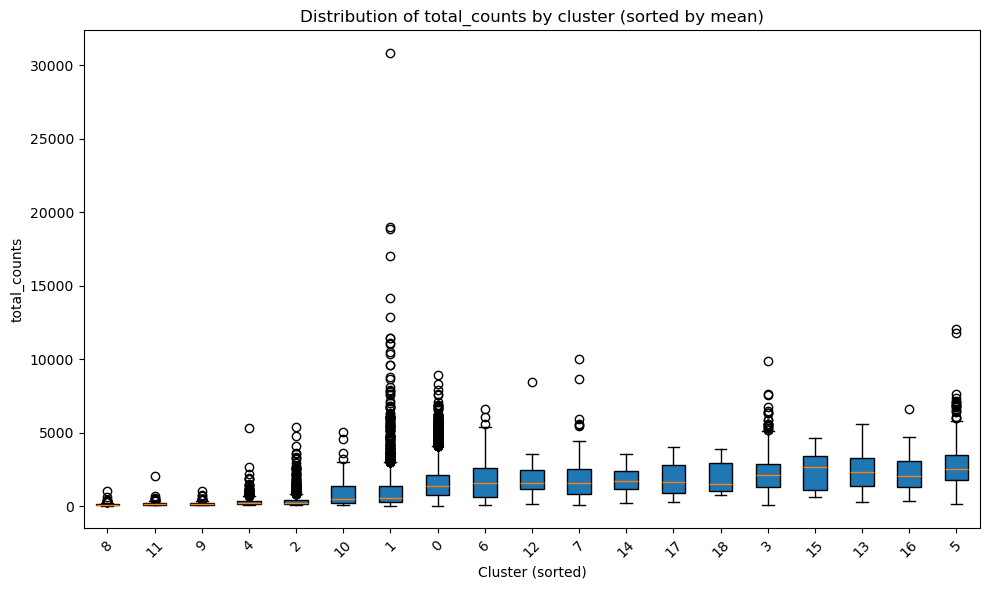

/tmp/ipykernel_3007770/3631609162.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cluster_key)[col]
/tmp/ipykernel_3007770/3631609162.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


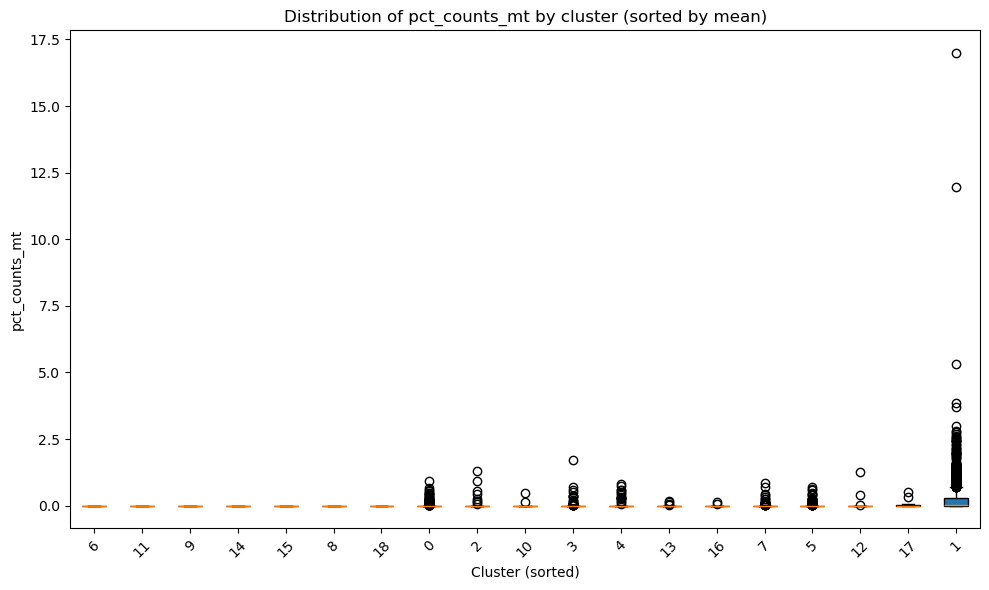

/tmp/ipykernel_3007770/3631609162.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cluster_key)[col]
/tmp/ipykernel_3007770/3631609162.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


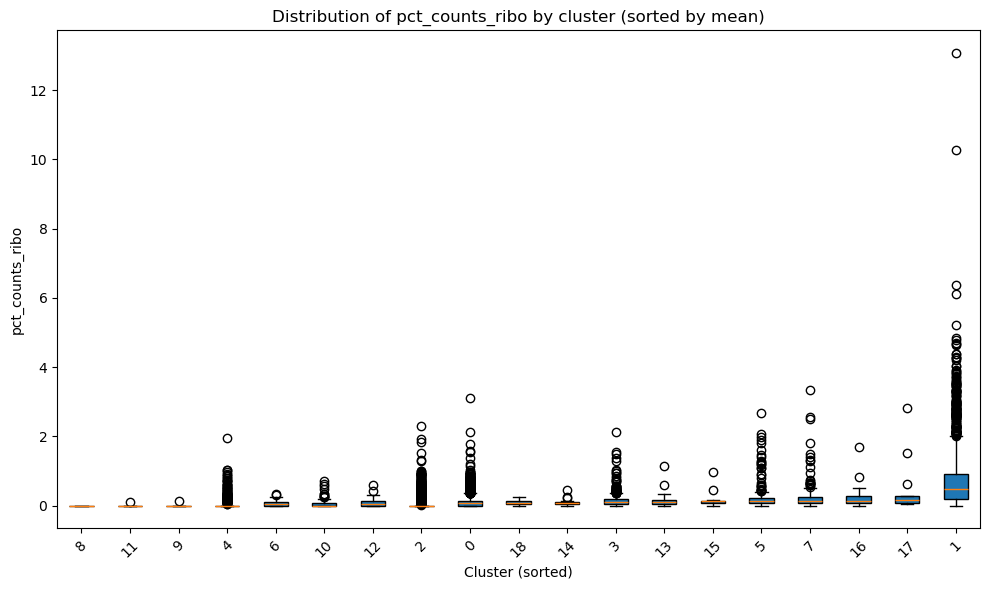

/tmp/ipykernel_3007770/3631609162.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cluster_key)[col]
/tmp/ipykernel_3007770/3631609162.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


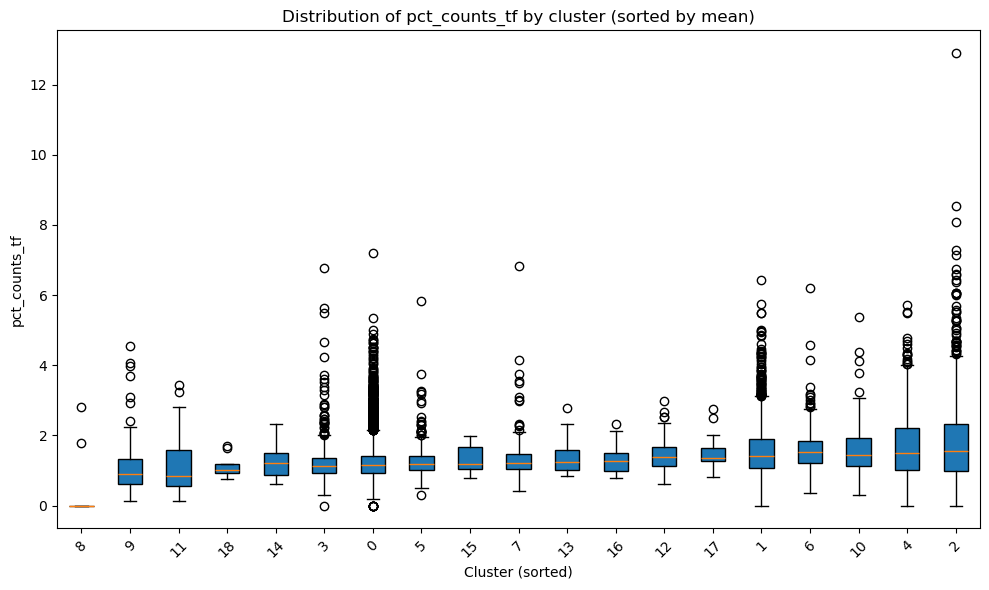

/tmp/ipykernel_3007770/3631609162.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cluster_key)[col]
/tmp/ipykernel_3007770/3631609162.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


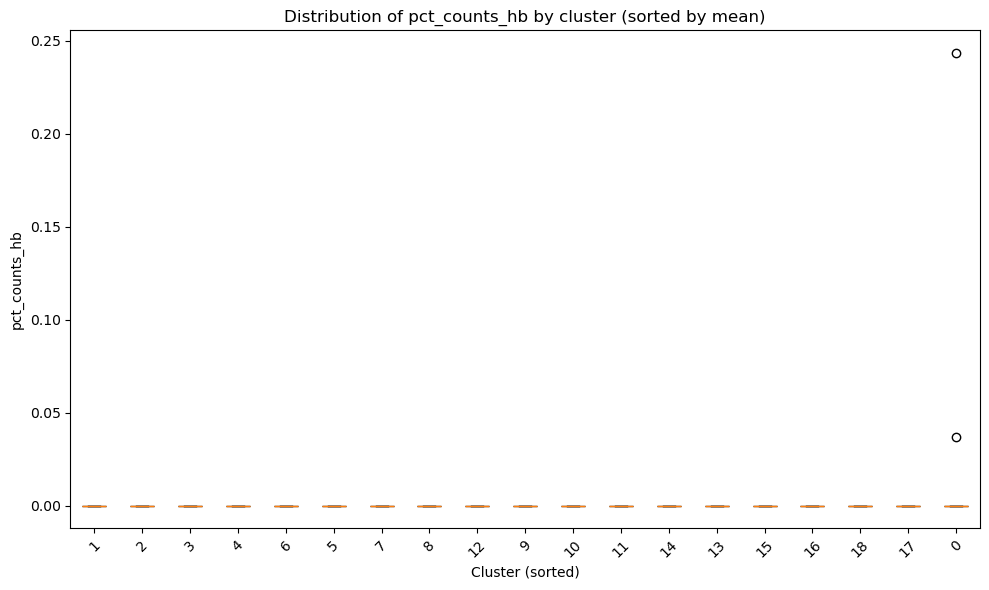

In [134]:
boxplot_obs_by_cluster(qc_adata, 'leiden', ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_tf', 'pct_counts_hb'])

In [125]:
import numpy as np
import pandas as pd
from kneed import KneeLocator

def select_outlier_clusters(adata, column, cluster_key='cluster', fixed_thres=None):
    """
    Identify clusters whose mean for `column` is substantially different
    from the global mean, using effect-size-normalized distance and
    an automatic inflection-point threshold.
    """
    df = adata.obs[[cluster_key, column]].copy()
    
    # global stats
    global_mean = df[column].mean()
    global_std = df[column].std()

    # per-cluster stats
    stats = df.groupby(cluster_key)[column].agg(['mean', 'std', 'count'])
    stats['mean_diff'] = (stats['mean'] - global_mean).abs()
    
    # normalize by pooled standard deviation (Cohen-type effect size)
    # pooled SD formula: sqrt( ((n1-1)*s1^2 + ...)/(N-k) )
    # Here clusters vary in size, but pooled sd is still well-defined [3].
    pooled_sd = np.sqrt(
        (np.sum((stats['count'] - 1) * stats['std']**2)) /
        (np.sum(stats['count']) - len(stats))
    )
    pooled_sd = pooled_sd if pooled_sd > 0 else global_std  # fallback    
    stats['effect_size'] = stats['mean_diff'] / pooled_sd
    
    # sort by effect size
    sorted_vals = stats['effect_size'].sort_values()
    
    if fixed_thres:
        threshold = fixed_thres
    else:
        # elbow detection (inflection)
        x = np.arange(len(sorted_vals))
        y = sorted_vals.values

        # Kneedle determines the "knee" where the curvature changes [4].
        knee = KneeLocator(
            x, y, curve='convex', direction='increasing', S=1, 
        ).knee

        if knee is None:
            # no clear inflection; fall back to a conservative cut (median + MAD)
            med = np.median(y)
            mad = np.median(np.abs(y - med))
            threshold = med + 2*mad
        else:
            threshold = y[knee]
        

    selected_clusters = stats.index[stats['effect_size'] >= threshold]

    return stats, threshold, selected_clusters


In [126]:
for metric in ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_tf', 'pct_counts_hb']:
    stats, threshold, selected = select_outlier_clusters(qc_adata, metric, cluster_key='leiden')
    print(f"{metric} threshold:", threshold)
    print("Selected clusters:", list(selected))

n_genes_by_counts threshold: 1.380399186666548
Selected clusters: ['8']
total_counts threshold: 1.088412197110598
Selected clusters: ['5', '8']
pct_counts_mt threshold: 0.15104684051717454
Selected clusters: ['1', '6', '8', '9', '11', '14', '15', '18']
pct_counts_ribo threshold: 0.519566507784476
Selected clusters: ['1', '8', '17']
pct_counts_tf threshold: 0.4359647031245818
Selected clusters: ['2', '4', '8', '10']
pct_counts_hb threshold: 0.00953417141557905
Selected clusters: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


/tmp/ipykernel_3007770/2369988337.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(cluster_key)[column].agg(['mean', 'std', 'count'])
/tmp/ipykernel_3007770/2369988337.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(cluster_key)[column].agg(['mean', 'std', 'count'])
/tmp/ipykernel_3007770/2369988337.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(clus

In [128]:
stats, threshold, selected = select_outlier_clusters(qc_adata, 'total_counts', cluster_key='leiden')
print("Threshold:", threshold)
print("Selected clusters:", list(selected))

Threshold: 1.088412197110598
Selected clusters: ['5', '8']


/tmp/ipykernel_3007770/2369988337.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(cluster_key)[column].agg(['mean', 'std', 'count'])


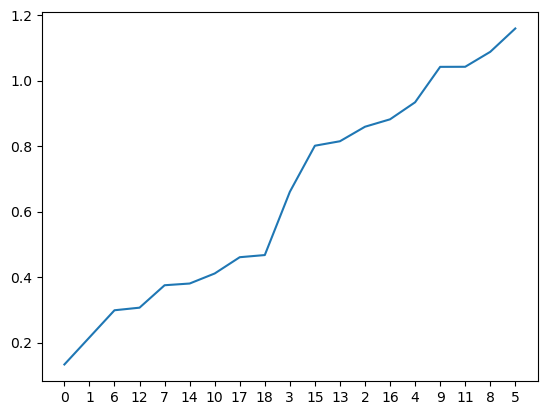

In [129]:
plt.plot(stats['effect_size'].sort_values())

In [108]:
select_outlier_clusters(qc_adata, 'total_counts', cluster_key='leiden')

/tmp/ipykernel_3007770/2164202562.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(cluster_key)[column].agg(['mean', 'std', 'count'])


(               mean          std  count    mean_diff  effect_size
 leiden                                                           
 0       2062.159864  1104.480600   2058   638.669466     0.565937
 1       1442.894231   942.870445   1976    19.403833     0.017194
 2       1283.344935  1891.295435   1609   140.145463     0.124186
 3        943.602393   809.133919   1421   479.888005     0.425238
 4       1004.338768   903.958450   1104   419.151630     0.371418
 5        550.232593   639.992677    675   873.257806     0.773811
 6       2442.225610  1253.460475    656  1018.735212     0.902721
 7       1623.629559   895.583213    521   200.139160     0.177347
 8       1518.866799  1035.893932    503    95.376401     0.084515
 9       1503.408451   896.076376    497    79.918053     0.070817
 10      1931.614833  1023.248693    418   508.124434     0.450259
 11       503.053299   600.989951    394   920.437099     0.815617
 12      2711.694864  1736.129656    331  1288.204466     1.14

In [109]:
qc_adata.uns

OrderedDict([('pca',
              {'params': {'zero_center': True,
                'use_highly_variable': False,
                'mask_var': None},
               'variance': array([3.86284841, 2.06137364, 1.71554153, 1.68669602, 1.63149317,
                      1.57376752, 1.51508854, 1.45247399, 1.44253577, 1.38008642,
                      1.36533682, 1.33722833, 1.32612516, 1.31606091, 1.29399114,
                      1.29260065, 1.27597914, 1.27063266, 1.26607025, 1.25354731,
                      1.24466027, 1.2410288 , 1.23199418, 1.22638991, 1.21982738,
                      1.21347757, 1.21238253, 1.20665465, 1.20380612, 1.19864159,
                      1.19608454, 1.19090318, 1.18899009, 1.18301925, 1.17569648,
                      1.17379053, 1.17026155, 1.16744835, 1.16466906, 1.16087401,
                      1.15955218, 1.15571481, 1.15402663, 1.15025593, 1.14863036,
                      1.1455423 , 1.14470502, 1.14054992, 1.13740216, 1.1333972 ]),
               'v

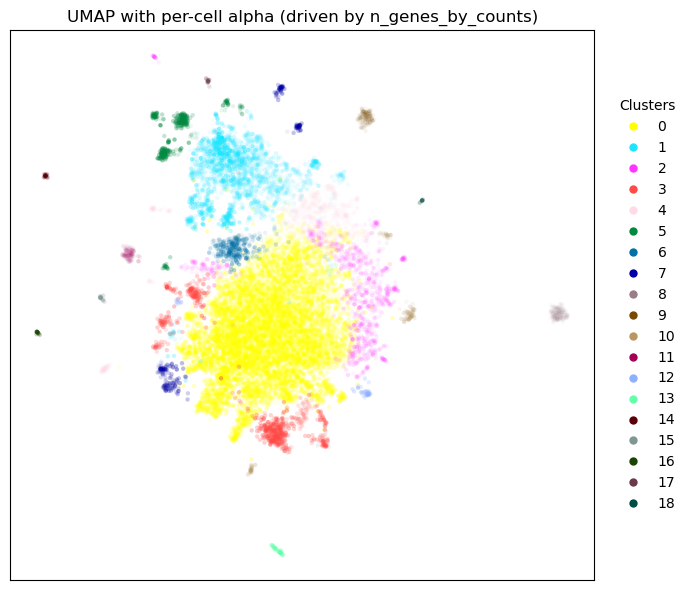

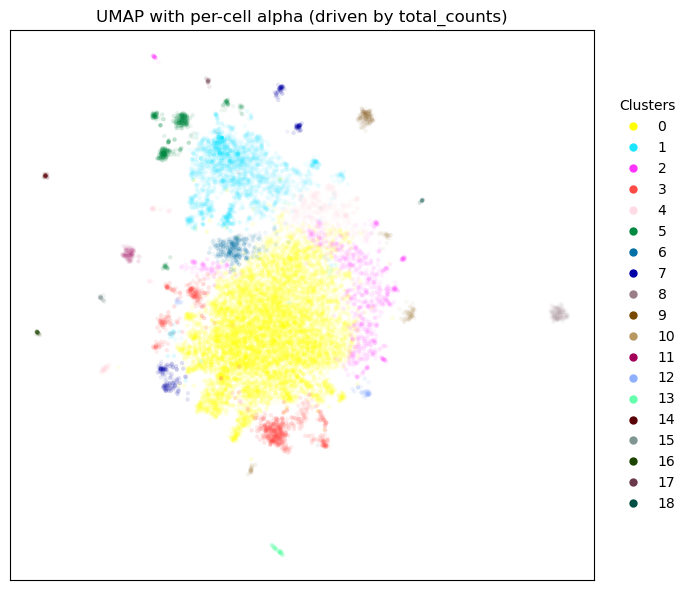

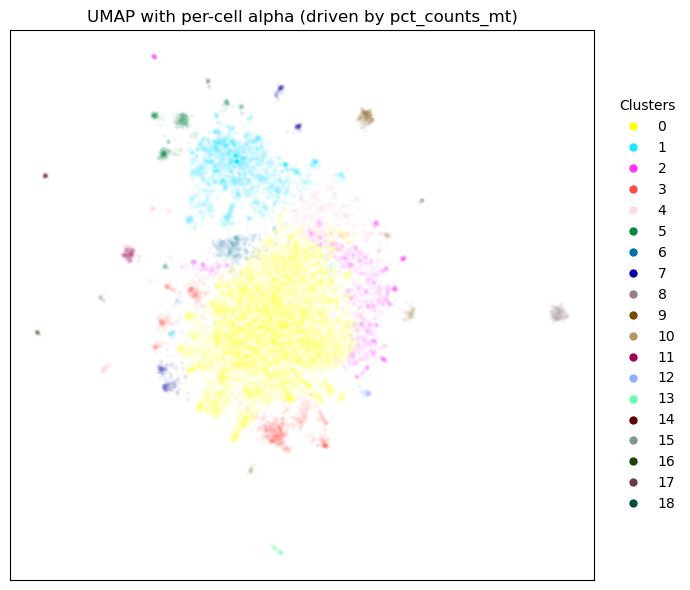

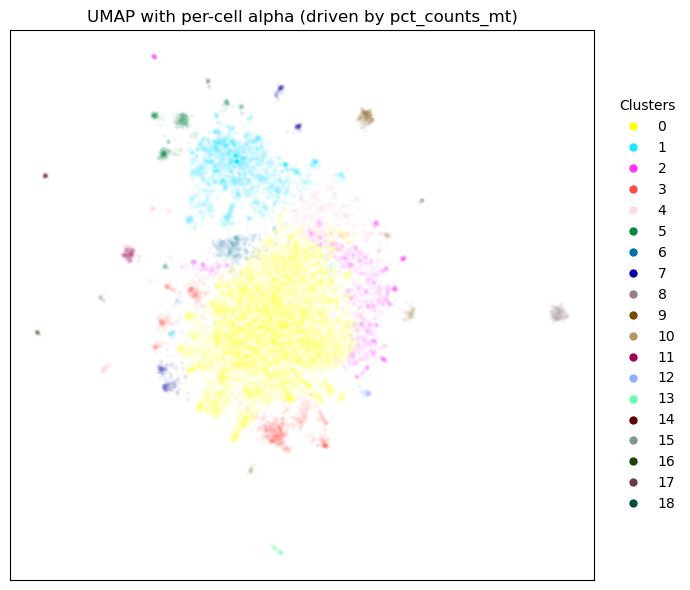

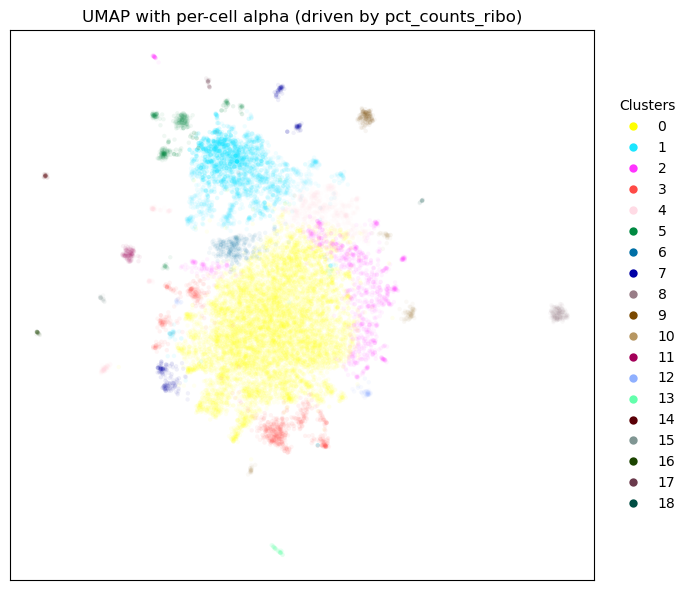

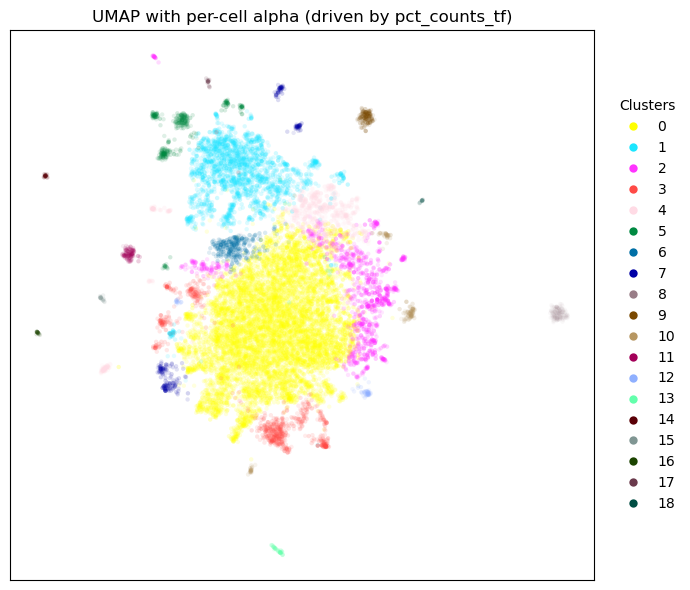

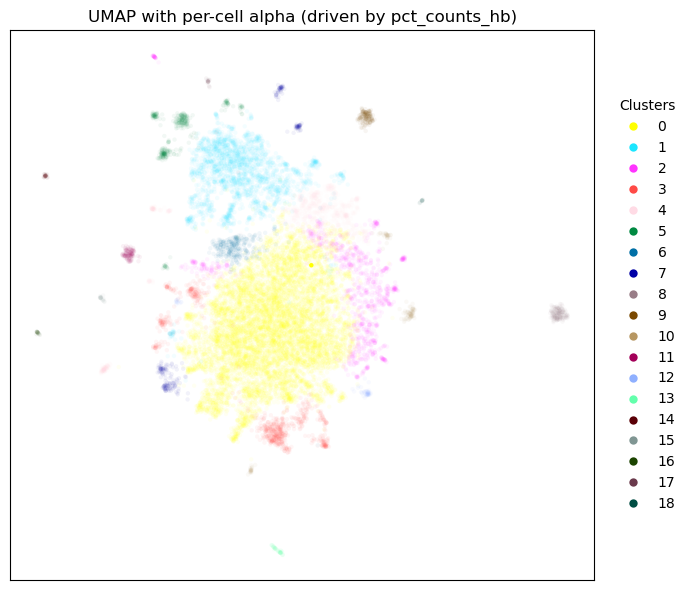

In [135]:
for metric in metrics:
    umap_alpha(qc_adata, color_col='leiden', alpha_col=metric, size= 10)

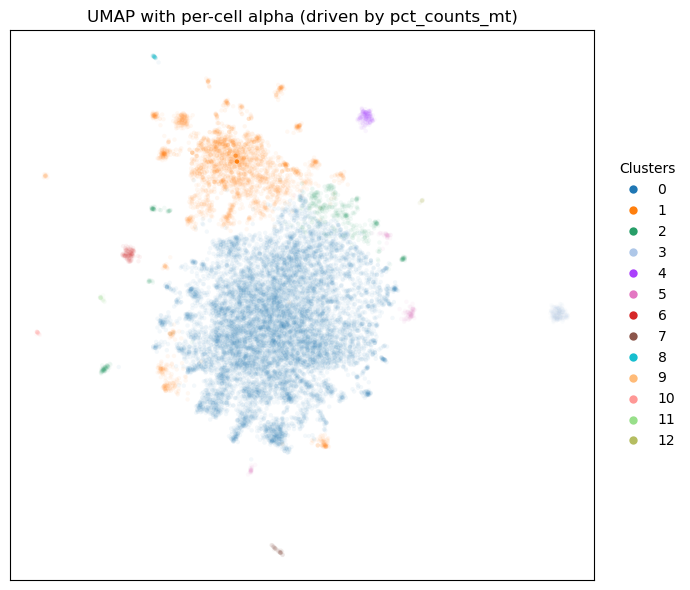

In [121]:
umap_alpha(qc_adata, color_col='leiden', alpha_col='pct_counts_mt', size= 10)

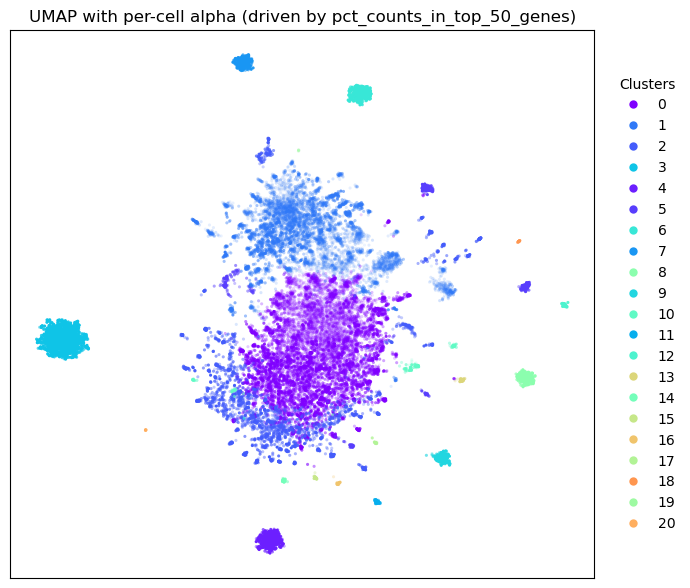

In [85]:
umap_alpha(qc_adata, color_col='leiden', alpha_col='pct_counts_in_top_50_genes', size= 5)

In [32]:
qc_adata

AnnData object with n_obs × n_vars = 19487 × 265
    obs: 'species', 'sample', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_tf', 'log1p_total_counts_tf', 'pct_counts_tf', 'n_counts', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'tf', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'qc_gene', 'n_cells', 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'